# Ejection Simulator and Analyser 2020

RF 2020

This Jupyter notebook builds on the introductory notebooks on synchrotron emission to allow some flexibility with the simulation of ejected blobs with reasonable physical parameters from stellar-scale objects.

## Part 1: Generation of initial parameters from physical inputs

A large range of models for transient radio emission can be produced by simply playing with how the radius varies with time, and the number density and magnetic field vary with the radius.

Let's implement a complete expanding blob model next. Since we are trying to simulate light curves for ejections with a given energy, we will want to be able to specify this energy and then convert that to physical parameters (primarily $N_0$, the 'number density density' - i.e. the number of electrons per unit energy interval per unit volume) for correct simulation of the model.

For $N(E) = N_0 E^{-p}$,t he total energy in electrons is given by

$$E_e = V \int_{E_1}^{E_2} E N(E) dE = V N_0 \frac{(E_2^{2-p} - E_1^{2-p})}{2-p}$$

and the total number of electrons by

$$N_e = V \int_{E_1}^{E_2} N(E) dE = V N_0 \frac{(E_2^{1-p} - E_1^{1-p})}{1-p}$$

which is useful for calculating the total rest mass of the blob and/or of any accompanying 'cold' protons.

We may therefore specify $E_1$, $E_2$ and $E_e$, as well as the initial size, and hence calculate the initial value of the variable $N_0$. We may then, for example, specify how close to equipartition the source is (specifically, what is the ratio of energy in electrons to that in magnetic field, $E_e$:$E_B$ and calculate our initial $B$ field).

Some thoughts on the values of $E_1$ and $E_2$, although they may not be very helpful. We know from in-situ acceleration of X-ray emitting synchrotron electrons that $\gamma_2 \geq 10^{7}$ (where $E_2 = \gamma_2 \times 511$keV, see e.g. Corbel et al. 2002 on the X-ray synchrotron emission from the jets of XTE J1550-564). We do not really know if there is a clear edge defined by $E_1$, or whether it blends into a (larger?) population of non-relativistic electrons. Note further that the size of a blob launched relatively close to the black hole has increased by $\geq 10^4$ by the time it is peaking in flux density at GHz radio frequencies, so all electrons which initially had $\gamma \leq 10^4$ would have cooled to be non-relativistic by this time (this is not necessary the case if the first burst of synchrotron emission we see is due to a shock at a considerably larger physical radius).

Since $p \sim 2$, usually, the total energy is quite weakly dependent on the values of $E_1$ and $E_2$, but for the total number of electrons, and possibly therefore cold protons and kinetic energy, it can be very important. As an example, for $p=2$, the total mass in cold protons (for one per electron) is

$$M_p \propto E_1^{-1} - E_2^{-1}$$

and so the total non-relativistic mass is much larger for a distribution of electrons which extends to low energies: $\gamma_1=1$ corresponds to 1000 times more mass than $\gamma_1=1000$. 
 

## Part 2: Expanding blob calculator

Now we have calculated the blob initial parameters, we can evolve our blob with time as it expands.

We need to know how the important variables vary as the blob expands. For linear expansion by a factor $\rho$, each electron drops in energy by the same factor, i.e. $E_2 \rightarrow E_2 / \rho$. We can work out what this means for the crucial variable $N_0$ by assuming conservation of particle number (following van der Laan 1966):

Total number of particles (as given above) is

$$N_e = V \int_{E_1}^{E_2} N(E) dE = V N_0 \frac{(E_2^{1-p} - E_1^{1-p})}{1-p}$$

Expanding by a factor $\rho$, $V_2 = \rho^3 V_1$, $E_{22} = E_{21}/\rho$, $E_{12} = E_{11}/\rho$ (where $E_{2x}$ is upper energy limit at epoch $x$, etc), conserving total number of particles:

$$N_{01} V \frac{(E_2^{1-p} - E_1^{1-p})}{1-p} = N_{02} \rho^3 V \left(\frac{1}{\rho}\right)^{1-p} \frac{(E_2^{1-p} - E_1^{1-p})}{1-p}$$

and so $N_0 \propto \rho^{-(2+p)}$. Naturally the total energy of the blob decreases as $\rho^{-1}$.

Magnetic flux conservation requires $B \propto \rho^{-2}$, which also therefore maintains whatever the intial ratio of $E_e : E_B$ was throughout the future expansion of the blob (as $E_B \propto V B^2 \propto \rho^{-1}$, the same evolution as $E_e$). In other words, in this simple model, once in equiparition, always in equipartition (actually you can see often that this is *not* true, because as some electrons cool off of the relativistic energy spectrum, with no other external influences or re-acceleration, the blob will become increasingly magnetically dominated).


In this part we create lots of np.arrays (anything which is defined as a function of time (t), the initial np.array, becomes an array which can be plotted and saved). You can add more calculations here if they're not included!

## Part 3: Plots

Here a range of plots (lightcurves, relativistic particle number and mass of associated protons*, evolution of electron spectrum, optical depths) are made. It should be clear from this template how to plot other quantities against each other in different ways.

(* this is interesting because it demonstrates that after some expansion many of the initially accelerated electrons may be non-relativistic, which means they're no longer emitting synchrotron emission (and their cyclotron emission is always self-absorbed) and 'their' budget of proton mass can be missed)

## Part 4: Analysis of simulated light curves (peaks)

We now want to consider what observables we might extract from our light curves if we were observing them. In the context of the equipartition analysis of Fender & Bright (and those who came before), these would be, for each peak, **observing frequency**, **peak flux density** (mJy) and **time of peak**). These are indeed the measurables which will be fed into our equipartition analysis, as if they were observations, in **phase II** below.

From these the total energy, radius and magnetic field would be inferred, so we record these from the simulation, to compare with those inferred from the observations.


 ______   ___   _  ____ ____ ___ __  __ 
/ ___\ \ / / \ | |/ ___/ ___|_ _|  \/  |
\__ _ \ V /|  \| | |   \___ \| || |\/| |
 ___) || | | |\  | |___ ___) | || |  | |
|____/ |_| |_| \_|\____|____/___|_|  |_|
Version 1.0
Rob Fender 2020
*****************************************************************************
Initial radius:  3.00e+08 cm
Total energy in (electrons, magnetic field):  1.00e+42 ,  1.33e+42 erg
Upper and lower Lorentz factors 1.00e+02 , 1.00e+07
Corresponding initial number density density: 7.59e+14
Total number of electrons:  1.11e+45 and mass in cold protons:  1.89e+21 g
The magnetic field  5.51e+08 G
In this field the power law spectrum extends from  1.54e+17 to  1.54e+22 Hz
*****************************************************************************

Lightcurves saved in files lc[1-3].csv and lccombined.csv



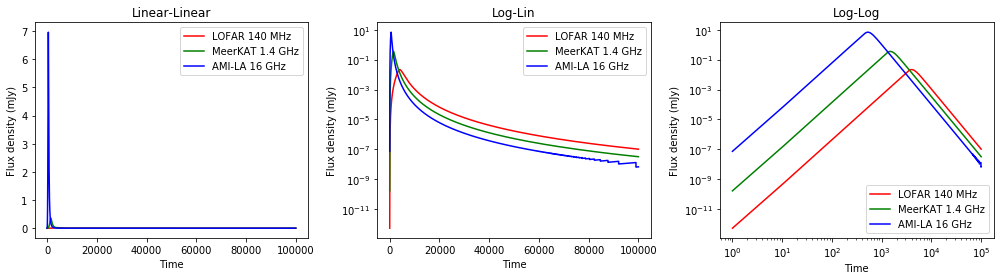

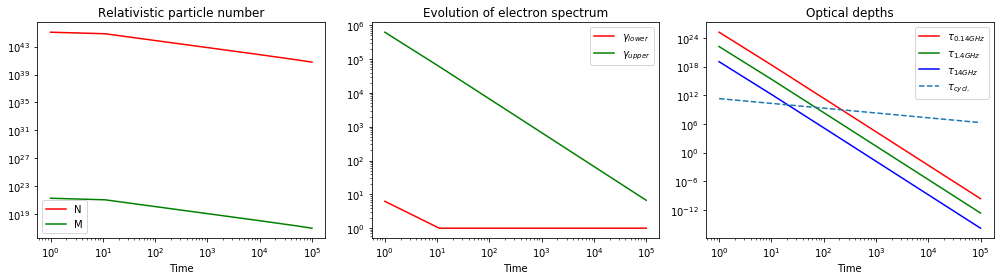

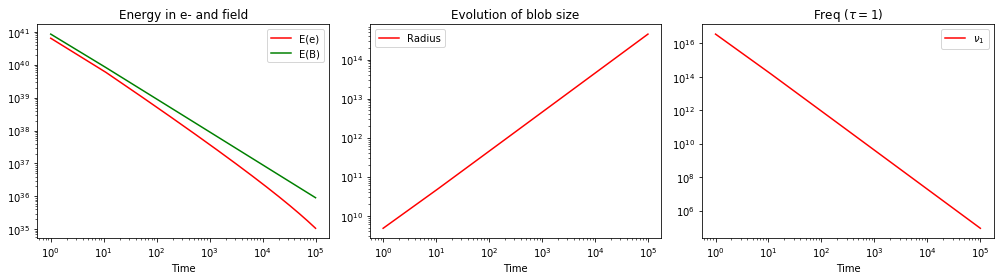

Time of peak at  16.00 GHz:  530.00 sec, at which time peak flux density was  6.96e+00  mJy
Corresponding radius:  2.39e+12  cm, B:  8.70e+00 G, E(total):  2.49e+38  erg.

Time of peak at  1.40 GHz:  1500.00 sec, at which time peak flux density was  3.60e-01  mJy
Corresponding radius:  6.75e+12  cm, B:  1.09e+00 G, E(total):  8.40e+37  erg.

Time of peak at  0.14 GHz:  4010.00 sec, at which time peak flux density was  2.19e-02  mJy
Corresponding radius:  1.80e+13  cm, B:  1.52e-01 G, E(total):  3.00e+37  erg.


Peaks analysis saved in sim_results.dat


Fin.



In [31]:

###############################################################
#*************************************************************#
####################### user inputs ###########################

p=2.01 # the power law index of the electron distribution
Ee=1e42 # total energy in electrons
Eb=(4/3)*Ee # total energy in magnetic fields, ratio to Ee is (4/3) in equipartition
gamma10=100 # initial Lorentz factor of lowest energy electrons 
gamma20=1e7 # initial Lorentz factor of lowest energy electrons
r0=3.0e8 # initial radius of blob when electron accelerated (e.g. 3e8 cm = 100 Schwarzschild radii for 10 M_sun BH)
vc=0.15 # expansion speed of blob in units of c (expansion here means expansion, not speed away from BH)
dkpc=8.0 # distance to source in kpc
n1ghz,n2ghz,n3ghz=0.14,1.4,16.0 # frequencies (in GHz) to evaluate light curve at
l1="LOFAR 140 MHz" # plot labels for those frequencies
l2="MeerKAT 1.4 GHz"
l3="AMI-LA 16 GHz"

###############################################################
#*************************************************************#
###############################################################

print (' ______   ___   _  ____ ____ ___ __  __ ')
print ('/ ___\ \ / / \ | |/ ___/ ___|_ _|  \/  |')
print ('\__ _ \\ V /|  \| | |   \___ \| || |\/| |')
print (' ___) || | | |\  | |___ ___) | || |  | |')
print ('|____/ |_| |_| \_|\____|____/___|_|  |_|')
print ('Version 1.0')
print ('Rob Fender 2020')

import matplotlib
import matplotlib.pyplot as plt
import sys
# the magic command which makes all the plots appear inline in the notebook
%matplotlib inline 
import numpy as np
import math

################### physical constants #############################
pi=3.142
e=4.803e-10 # electron charge cgs
c=2.998e10 # speed of light cgs
m=9.108e-28 # electron mass cgs
me=8.2e-7 # rest mass energy of electron in erg (511 keV)
mp=1.7e-24 # proton rest mass cgs

########## Exactly calculate Pacholczyk c1-c7 ##################

# constant c1 is just a combination of other constants
# 'check's are the actual formulae, you can print these to check if you like
c1=6.27e18
c1check=(3*e)/(4*pi*(m**3)*(c**5))

# same for c2
c2=2.37e-3
c2check=(2*e**4)/(3*(m**4)*(c**7))

# and c3
c3=1.87e-23
c3check=((3**0.5)*(e**3))/(4*pi*m*(c**2))

# c4 and c7 are combinations of these, and hence also constant
c4=2.63e26
c7=1.12e24

# Exact calculation of c5 and c6 rather than using tabulated versions
c5=((3**0.5)*(e**3)*(p+(7.0/3.0))*math.gamma((3*p-1)/12)*math.gamma((3*p+7)/12))/(16*pi*m*(c**2)*(p+1))
c6=((3**0.5)*pi*e*(m**5)*(c**10)*(p+(10.0/3.0))*math.gamma((3*p+2)/12)*math.gamma((3*p+10)/12))/(72.0)

#################################################################

# solid angle for a source of size s and distance d (small angle approximation)
def solidangle(r,d):
    omega=np.pi * (r**2.0) / (d**2.0)
    return omega # in steradians

# calculate nu1, frequency at which optical depth tau = 1
def nutau1 (r,p,N0,B):
    nu1= 2 * c1 * (r * c6)**(2/(p+4)) * N0**(2/(p+4)) * B**((p+2)/(p+4))
    return nu1 # in Hz

# Source function at nu1
def SFtau1 (B,nu1):
    SF=(c5 / c6 ) * B**(-0.5) * (nu1 / (2 * c1))**(2.5)
    return SF

# The following function will return the flux density as a function
# of frequency, nu1, source function and source angular size, in mJy
def F(freq,nu1,SF,omega):
    z=freq/nu1
    j=z**2.5 * (1 - np.exp(-z**(-(p+4)/2)))
    I=SF*j
    flux=I*omega*1.0e26
    return flux

# Determine initial conditions of new blob based upon input total electron energy,
# electron spectrum bounds, size, and deviation from equipartition

E10=gamma10*me # lower bound on electron energy converted to erg
E20=gamma20*me # upper bound on electron energy converted to erg

V=(1.3*pi*(r0**3)) # volume

I2=(E20**(2-p)-E10**(2-p))/(2-p) # energy calculation integral
N00=Ee/(V * I2) # initial value of N0, the energy density density


#############################################################

# Integrated number of electrons, and corresponding mass
# for one proton for each electron

I1=(E20**(1-p)-E10**(1-p))/(1-p) # particle number calculation integral
Ntot=V * I1 * N00

Mtot=Ntot*mp

#############################################################

# Determine B from ratio to equipartition, having established Ee

B0=(8 *np.pi * Eb / V)**(0.5)

# a constant for determining synchrotron frequencies
csynch=2.8e6*B0

#############################################################

print ('*****************************************************************************')
print ('Initial radius:','% .2e' % r0,'cm')
print ('Total energy in (electrons, magnetic field):','% .2e' % Ee,',','% .2e' % Eb,'erg')
print ('Upper and lower Lorentz factors','%.2e' % gamma10,',','%.2e' % gamma20)
print ('Corresponding initial number density density:','%.2e' % N00)
print ('Total number of electrons:','% .2e' % Ntot,'and mass in cold protons:','% .2e' % Mtot,'g')
print ('The magnetic field','% .2e' % B0, 'G')
print ('In this field the power law spectrum extends from','% .2e' % (gamma10*csynch),'to', '% .2e' % (gamma20*csynch), 'Hz')
print ('*****************************************************************************')

############################################
##                                        ##
##                 Part 2                 ##
##      Calculating the light curves      ##
##                                        ##
############################################

# Here we will calculate how the flux at a given frequency evolves with time
# as some synchrotron-emitting blob expands

# switch expansion speed, distance and observing freqs to real units
v=vc*c
d=dkpc*3.1e21 
n1=n1ghz*1.0e9
n2=n2ghz*1.0e9
n3=n3ghz*1.0e9

# here is a very simple function for radius as a function of time, 
# but you can make it as complicated as you like
def radius(t):   
# this is a power-law expansion. Linear expansion (e.g. vdL) gives a=1.0   
    a=1.0
    r=r0+(v*(t**a))
    return r
    
# similarly here is a very simple prescription for how B varies with radius
# we set a simple parameter b for power-law evolution
# in van der Laan it varies as R^{-2}, i.e. b=-2.0 which preserves equipartition ratio

def Br(r):
    b=-2.0
    B=B0*((r/r0)**b)
    return B

# ... and how N0 varies (van der Laan is R^{-(2+p)})
def N0r(r):
    N0=N00*((r/r0)**(-(2+p)))
    return N0

# total mass in protons (should be conserved!!)
def MNr(N0,E10,E20,R):
    V=1.33 * np.pi * (R**3)
    I1=(E20**(1-p)-E10**(1-p))/(1-p)
    Ntot=V * I1 * N0
    Mtot=Ntot*mp
    return Mtot,Ntot

tmax=100000 # time range
tsteps=10000 # number of steps
tstep=tmax/tsteps # size of each step
t=np.linspace(1.0,tmax,tsteps)

rr=radius(t) # radius as a function of time
br=Br(rr) # magnetic fields as a function of time

# cyclotron freq, just for information (and as sanity check that cycl. is always self-absorbed)
cyc=2.8e6 * br

nr=N0r(rr)
# energy of upper and lower parts of electron spectrum, drops as blob expands
gamma1=gamma10*(r0/rr)
gamma2=gamma20*(r0/rr)
# do not allow Lorentz factor to be less than 1
gamma1[gamma1<1]=1
gamma2[gamma2<1]=1
# convert to physical units
E1=gamma1*me
E2=gamma2*me

# corresponding upper and lower synchrotron emission frequencies
nu1=2.8e6 * ((E1/me)**2)*br
nu2=2.8e6 * ((E2/me)**2)*br

# mass in, and number of, protons (for one proton for each electron)
M,N=MNr(nr,E1,E2,rr)

# solid angle
omega=pi * (rr**2.0) / (d**2.0)

# tau=1 frequency, and source function at that frequency
nu1r=nutau1(rr,p,nr,br)
sfr=SFtau1(br,nu1r)

# add here an optical depth term (for p=2.0, so slighty approximate for p not 2) [Pacholcyzk Equation 3.52]
# absorption coefficients
kappa1=c6 * nr * (br**2) * ((n1/(2 * c1))**(-3))
kappa2=c6 * nr * (br**2) * ((n2/(2 * c1))**(-3))
kappa3=c6 * nr * (br**2) * ((n3/(2 * c1))**(-3))
kappac=c6 * nr * (br**2) * ((cyc/(2 * c1))**(-3))

# optical depths
tau1=kappa1*rr
tau2=kappa2*rr
tau3=kappa3*rr
tauc=kappac*rr

# internal energy in magnetic fields
eb=((br**2)/(8*np.pi))*(1.33*pi*(rr**3))
# internal energy in particles
ee=nr*(1.33*pi*(rr**3))*(E2**(2.0-p)-E1**(2.0-p))/(2.0-p)

# maximum values
ebm=np.amax(eb)
eem=np.amax(ee)

# y are flux density curves
y1=F(n1,nu1r,sfr,omega)
y2=F(n2,nu1r,sfr,omega)
y3=F(n3,nu1r,sfr,omega)

lc1=np.vstack((t,y1)).T
lc2=np.vstack((t,y2)).T
lc3=np.vstack((t,y3)).T
lccombined=np.vstack((t,y1,y2,y3)).T # produces a combined array of time, fluxes

np.savetxt('lc1.csv', lc1, delimiter=',')
np.savetxt('lc2.csv', lc2, delimiter=',')
np.savetxt('lc3.csv', lc3, delimiter=',')
np.savetxt('lccombined.csv', outputlc, delimiter=',')
# following this^ approach you can output any arrays in any way you like

print('')
print('Lightcurves saved in files lc[1-3].csv and lccombined.csv')
print('')

# We have calculated a LOT of different arrays here which we could potentially plot and output!

############################################
##                                        ##
##                 Part 3                 ##
##                 Plots                  ##
##                                        ##
############################################

# easy to calculate the light curves with these functions
# takes more lines to plot it nicely, in three different formats

plots=True # you can turn the plots on and off (they can take time)
if plots:

    # a row of three figures
    plt.figure(figsize=(14,4))
    plt.subplot(1,3,1)
    plt.plot(t,y1,'r', label=l1)
    plt.plot(t,y2,'g', label=l2)
    plt.plot(t,y3,'b', label=l3)
    plt.xlabel("Time")
    plt.ylabel("Flux density (mJy)")
    plt.title('Linear-Linear')
    plt.legend()

    plt.subplot(1,3,2)
    plt.yscale('log')
    plt.plot(t,y1,'r', label=l1)
    plt.plot(t,y2,'g', label=l2)
    plt.plot(t,y3,'b', label=l3)
    plt.xlabel("Time")
    plt.ylabel("Flux density (mJy)")
    plt.title('Log-Lin')
    plt.legend()

    plt.subplot(1,3,3)
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(t,y1,'r', label=l1)
    plt.plot(t,y2,'g', label=l2)
    plt.plot(t,y3,'b', label=l3)
    plt.xlabel("Time")
    plt.ylabel("Flux density (mJy)")
    plt.title('Log-Log')
    plt.legend()

    plt.tight_layout()
    plt.savefig("lightcurves.png")
    plt.show()


    # a(nother) row of three figures
    plt.figure(figsize=(14,4))
    plt.subplot(1,3,1)
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(t,N,'r',label='N')
    plt.plot(t,M,'g', label='M')
    plt.xlabel("Time")
    plt.ylabel("")
    plt.title('Relativistic particle number')
    plt.legend()

    plt.subplot(1,3,2)
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(t,gamma1,'r',label=r'$\gamma_{lower}$')
    plt.plot(t,gamma2,'g', label=r'$\gamma_{upper}$')
    plt.xlabel("Time")
    plt.ylabel("")
    plt.title('Evolution of electron spectrum')
    plt.legend()

    plt.subplot(1,3,3)
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(t,tau1,'r',label=r'$\tau_{0.14 GHz}$')
    plt.plot(t,tau2,'g',label=r'$\tau_{1.4 GHz}$')
    plt.plot(t,tau3,'b',label=r'$\tau_{14 GHz}$')
    plt.plot(t,tauc,'--',label=r'$\tau_{cycl.}$')
    plt.xlabel("Time")
    plt.ylabel("")
    plt.title("Optical depths")
    plt.legend()

    plt.tight_layout()
    plt.savefig("anotherfigure.png")
    plt.show()

    # a(nother) row of three figures
    plt.figure(figsize=(14,4))
    plt.subplot(1,3,2)
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(t,rr,'r',label=r'Radius')
    plt.xlabel("Time")
    plt.ylabel("")
    plt.title('Evolution of blob size')
    plt.legend()

    plt.subplot(1,3,1)
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(t,ee,'r',label='E(e)')
    plt.plot(t,eb,'g', label='E(B)')
    plt.xlabel("Time")
    plt.ylabel("")
    plt.title('Energy in e- and field')
    plt.legend()

    plt.subplot(1,3,3)
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(t,nu1r,'r',label=r'$\nu_1$')
    plt.xlabel("Time")
    plt.ylabel("")
    plt.title(r"Freq ($\tau=1$)")
    plt.legend()

    plt.tight_layout()
    plt.savefig("anotherfigure.png")
    plt.show()

############################################
##                                        ##
##                 Part 4                 ##
##      Analysis of the light curves      ##
##    Peaks and assoc. phys. parameters   ##
##                                        ##
############################################


# Analysis of the light curves
# np.argmax gives the index of the peak value of the light curve

def peaks(f,y):
    t=np.argmax(y) # index of peak 
    time=t*tstep
    peak=y[t] # flux density at peak 
    r=rr[t] # radius at peak
    b=br[t] # magnetic field at peak 
    nghz=f/1.e9 # freq in GHz
    etot=ee[t]+eb[t]
    print ('Time of peak at','% .2f' % nghz,'GHz:','% .2f' % time, 'sec, at which time peak flux density was','% .2e' % peak,' mJy')
    print ('Corresponding radius:','% .2e' % r,' cm, B:','% .2e' % b,'G, E(total):','% .2e' % etot,' erg.')
    print()
    return time,peak,nghz,r,b,etot
    
results=[]

# note that the 2nd column output is the time multiplier required to switch to seconds
# (some times are more readily recorded in hours/days etc)

time,peak,nghz,r,b,etot=peaks(n3,y3)
results.append([time,1.0,peak,nghz,r,b,etot])

time,peak,nghz,r,b,etot=peaks(n2,y2)
results.append([time,1.0,peak,nghz,r,b,etot])

time,peak,nghz,r,b,etot=peaks(n1,y1)
results.append([time,1.0,peak,nghz,r,b,etot])

# output data file which analysis package can work on
npr=np.array(results)
np.savetxt('sim_results.dat',npr,fmt='%.4e', delimiter=',')
np.savetxt('../../paper66/sim_results.dat',npr,fmt='%.4e', delimiter=',') # specify some particular path

print('')
print('Peaks analysis saved in sim_results.dat')
print('')
print('')
print('Fin.')
print('')
